In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of 1500 random latitude and longitude combinations

lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
print(len(cities))

641


In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | purranque
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | caraballeda
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | hay river
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 13 of Set 1 | kirakira
Processing Record 14 of Set 1 | okha
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | lima
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | katsuura
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | syamzha
Processing Record 21 of Set 1 | langsa
Processing Record 22 of Set 1 | pisco
Pro

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,54.37,99,100,4.79,NZ,2023-01-10 21:47:10
1,Kodiak,57.7900,-152.4072,35.11,100,75,0.00,US,2023-01-10 21:47:11
2,Hilo,19.7297,-155.0900,88.29,61,100,9.22,US,2023-01-10 21:47:12
3,Purranque,-40.9167,-73.1667,60.13,37,79,7.90,CL,2023-01-10 21:47:12
4,Saldanha,-33.0117,17.9442,62.65,86,100,9.95,ZA,2023-01-10 21:47:12
5,Hobart,-42.8794,147.3294,60.26,81,20,5.75,AU,2023-01-10 21:44:33
6,Caraballeda,10.6112,-66.8522,87.87,70,40,6.91,VE,2023-01-10 21:47:14
7,Castro,-24.7911,-50.0119,65.37,91,54,3.76,BR,2023-01-10 21:47:14
8,Hay River,60.8156,-115.7999,10.38,85,100,8.05,CA,2023-01-10 21:47:15
9,Carnarvon,-24.8667,113.6333,72.36,66,0,15.46,AU,2023-01-10 21:47:15


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2023-01-10 21:47:10,-46.1927,168.8643,54.37,99,100,4.79
1,Kodiak,US,2023-01-10 21:47:11,57.7900,-152.4072,35.11,100,75,0.00
2,Hilo,US,2023-01-10 21:47:12,19.7297,-155.0900,88.29,61,100,9.22
3,Purranque,CL,2023-01-10 21:47:12,-40.9167,-73.1667,60.13,37,79,7.90
4,Saldanha,ZA,2023-01-10 21:47:12,-33.0117,17.9442,62.65,86,100,9.95
5,Hobart,AU,2023-01-10 21:44:33,-42.8794,147.3294,60.26,81,20,5.75
6,Caraballeda,VE,2023-01-10 21:47:14,10.6112,-66.8522,87.87,70,40,6.91
7,Castro,BR,2023-01-10 21:47:14,-24.7911,-50.0119,65.37,91,54,3.76
8,Hay River,CA,2023-01-10 21:47:15,60.8156,-115.7999,10.38,85,100,8.05
9,Carnarvon,AU,2023-01-10 21:47:15,-24.8667,113.6333,72.36,66,0,15.46


In [12]:
# Create the output file (CSV)
import os
output_data_file = os.path.join('weather_data', 'cities.csv')

# Export the city_data_df into a CSV.
city_data_df.to_csv(output_data_file)

In [13]:
file_to_load = output_data_file

city_data_df = pd.read_csv(file_to_load)
city_data_df.drop(columns=["Unnamed: 0"])

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2023-01-10 21:47:10,-46.1927,168.8643,54.37,99,100,4.79
1,Kodiak,US,2023-01-10 21:47:11,57.7900,-152.4072,35.11,100,75,0.00
2,Hilo,US,2023-01-10 21:47:12,19.7297,-155.0900,88.29,61,100,9.22
3,Purranque,CL,2023-01-10 21:47:12,-40.9167,-73.1667,60.13,37,79,7.90
4,Saldanha,ZA,2023-01-10 21:47:12,-33.0117,17.9442,62.65,86,100,9.95
...,...,...,...,...,...,...,...,...,...
582,Zhigalovo,RU,2023-01-10 22:03:44,54.8097,105.1578,0.39,96,100,2.57
583,Wilmington,US,2023-01-10 22:02:23,34.2257,-77.9447,55.94,61,0,4.61
584,Upernavik,GL,2023-01-10 22:03:44,72.7868,-56.1549,-22.79,98,91,6.58
585,La Ronge,CA,2023-01-10 22:03:44,55.1001,-105.2842,7.30,95,99,0.65


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

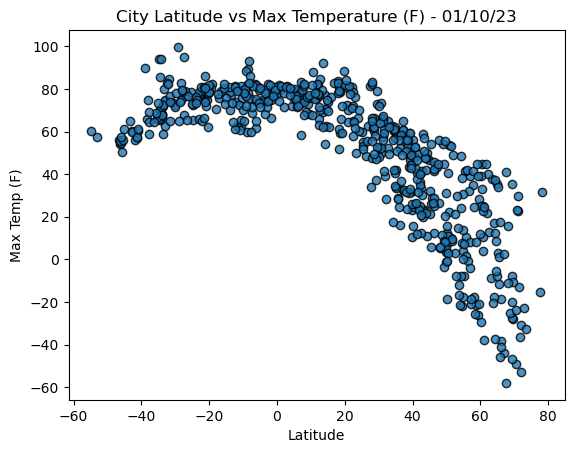

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats, max_temps,
    edgecolors= "black", linewidths= 1,
    alpha= 0.8, label="Cities"
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature (F) - {time.strftime('%x')}")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
# Save the figure.
plt.savefig(os.path.join('weather_data', 'Fig1.png'))

# Show plot.
plt.show()

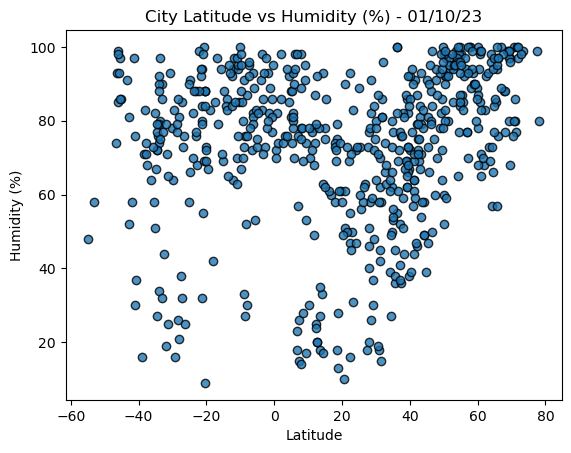

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats, humidity,
    edgecolors= "black", linewidths= 1,
    alpha= 0.8, label="Cities"
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity (%) - {time.strftime('%x')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
# Save the figure.
plt.savefig(os.path.join('weather_data', 'Fig2.png'))

# Show plot.
plt.show()

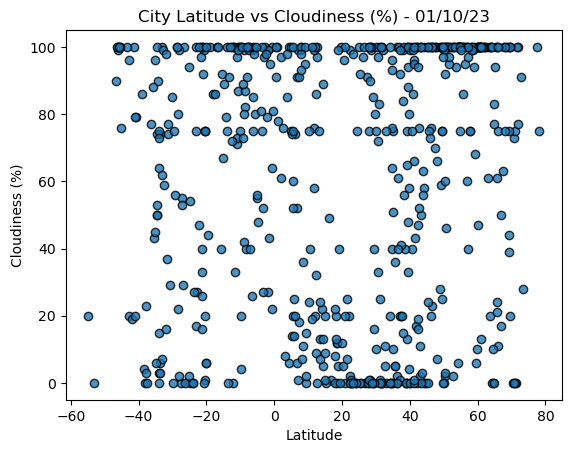

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats, cloudiness,
    edgecolors= "black", linewidths= 1,
    alpha= 0.8, label="Cities"
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness (%) - {time.strftime('%x')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
# Save the figure.
plt.savefig(os.path.join('weather_data', 'Fig3.png'))

# Show plot.
plt.show()

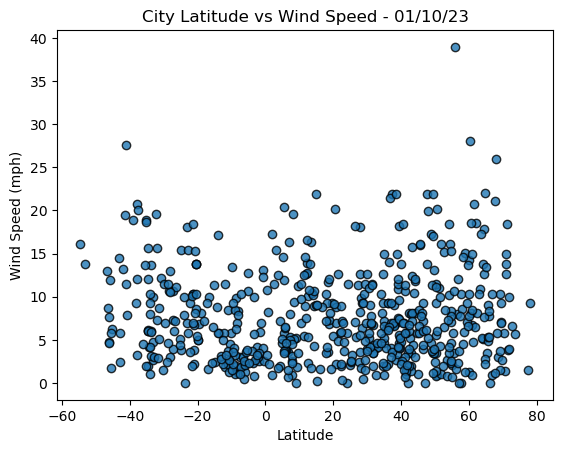

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats, wind_speed,
    edgecolors= "black", linewidths= 1,
    alpha= 0.8, label="Cities"
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed - {time.strftime('%x')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
# Save the figure.
plt.savefig(os.path.join('weather_data', 'Fig4.png'))

# Show plot.
plt.show()